In [2]:
%matplotlib inline

In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import math
import scipy.stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

/home/brianc/anaconda3/envs/mlenv/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
data = pd.read_csv('biomedical datasets/compiled dataset/PArelated-data_labelled.csv')
cols = data.columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
print(len(data))
data[:5]

3146


,FIPS_Codes,PA_Tweets,All_Tweets,Inactivity_Cases,Inactivity_Percent,Inactivity_Ageadjusted,Diabetes_newcases,Daibetes_rateperhundred,Daibetes_rateperthousand,Diabetes_number,Diabetes_prev,Daibetes_ageadj_prev
0,1001,104,6063,11342.0,28.6,28.0,383.0,11.0,10.7,5144.0,13.0,11.9
1,1003,511,27019,32856.0,22.3,21.2,1078.0,8.1,7.4,15367.0,10.4,8.8
2,1005,5,802,6578.0,31.8,31.0,291.0,17.0,16.6,3813.0,18.4,16.9
3,1007,1,591,5846.0,33.9,33.3,193.0,13.1,12.8,2557.0,14.8,13.8
4,1009,23,1681,11954.0,28.0,27.1,433.0,11.7,11.0,5990.0,14.1,12.3


In [72]:
gini_data = pd.read_csv('biomedical datasets/GINI 2014/ACS_13_5YR_B19083_with_ann.csv', 
                        encoding='latin-1', skiprows=[0])
#gini_data['GEO.id2'] = gini_data['GEO.id2'].apply(pd.to_numeric)
gini_data[:5]
#gini_data.columns.to_series().groupby(gini_data.dtypes).groups, gini_data.dtypes

,Id,Id2,Geography,Estimate; Gini Index,Margin of Error; Gini Index
0,0500000US01001,1001,"Autauga County, Alabama",0.4031,0.0149
1,0500000US01003,1003,"Baldwin County, Alabama",0.4455,0.0095
2,0500000US01005,1005,"Barbour County, Alabama",0.4658,0.0146
3,0500000US01007,1007,"Bibb County, Alabama",0.4500,0.0468
4,0500000US01009,1009,"Blount County, Alabama",0.4144,0.0137


In [174]:
merged = data.merge(gini_data, left_on='FIPS_Codes', right_on='Id2', how='inner')
#merged = data
merged = merged[merged['All_Tweets'] > 30000]
merged['PA_Tweets_Percent'] = merged['PA_Tweets'] / merged['All_Tweets']
print(len(merged))
merged[:5]

273


,FIPS_Codes,PA_Tweets,All_Tweets,Inactivity_Cases,Inactivity_Percent,Inactivity_Ageadjusted,Diabetes_newcases,Daibetes_rateperhundred,Daibetes_rateperthousand,Diabetes_number,Diabetes_prev,Daibetes_ageadj_prev,Id,Id2,Geography,Estimate; Gini Index,Margin of Error; Gini Index,PA_Tweets_Percent
36,1073,1755,139195,128496.0,26.2,25.7,4770.0,11.1,10.8,63518.0,13.0,12.0,0500000US01073,1073,"Jefferson County, Alabama",0.4972,0.0064,0.012608
44,1089,613,57228,58615.0,22.7,22.3,2249.0,9.7,9.4,29818.0,11.5,10.6,0500000US01089,1089,"Madison County, Alabama",0.4654,0.0069,0.010712
48,1097,384,43119,84903.0,28.0,27.4,3583.0,13.8,13.4,47210.0,15.6,14.3,0500000US01097,1097,"Mobile County, Alabama",0.4711,0.0065,0.008906
50,1101,337,37270,43886.0,26.5,26.3,1721.0,11.9,11.9,22380.0,13.5,12.9,0500000US01101,1101,"Montgomery County, Alabama",0.4756,0.0082,0.009042
62,1125,549,42837,38806.0,26.2,26.4,1427.0,10.9,11.4,18203.0,12.3,12.6,0500000US01125,1125,"Tuscaloosa County, Alabama",0.4678,0.0108,0.012816


In [202]:
merged.drop(['FIPS_Codes', 'Id2'], axis=1).corr('pearson')

,PA_Tweets,All_Tweets,Inactivity_Cases,Inactivity_Percent,Inactivity_Ageadjusted,Diabetes_newcases,Daibetes_rateperhundred,Daibetes_rateperthousand,Diabetes_number,Diabetes_prev,Daibetes_ageadj_prev,Estimate; Gini Index,Margin of Error; Gini Index,PA_Tweets_Percent
PA_Tweets,1.000000,0.957977,0.863035,-0.103808,-0.083199,0.891159,-0.088897,-0.029358,0.888219,-0.123248,-0.047901,0.301586,-0.324815,0.227209
All_Tweets,0.957977,1.000000,0.876738,-0.077464,-0.050507,0.881989,-0.073145,0.003620,0.880242,-0.114721,-0.015798,0.390106,-0.371829,0.106918
Inactivity_Cases,0.863035,0.876738,1.000000,0.082020,0.099947,0.986649,0.050291,0.092783,0.988547,0.013192,0.069246,0.262840,-0.484534,0.138812
Inactivity_Percent,-0.103808,-0.077464,0.082020,1.000000,0.992745,0.037973,0.803011,0.759457,0.039745,0.808680,0.773552,0.104063,0.120300,-0.409310
Inactivity_Ageadjusted,-0.083199,-0.050507,0.099947,0.992745,1.000000,0.055404,0.793479,0.782895,0.054544,0.779605,0.794494,0.119747,0.094968,-0.405482
Diabetes_newcases,0.891159,0.881989,0.986649,0.037973,0.055404,1.000000,0.067996,0.110096,0.998729,0.025476,0.083313,0.241240,-0.458291,0.147938
Daibetes_rateperhundred,-0.088897,-0.073145,0.050291,0.803011,0.793479,0.067996,1.000000,0.957153,0.062987,0.971487,0.948530,0.101514,0.137150,-0.345132
Daibetes_rateperthousand,-0.029358,0.003620,0.092783,0.759457,0.782895,0.110096,0.957153,1.000000,0.098782,0.885103,0.985763,0.150898,0.087475,-0.328212
Diabetes_number,0.888219,0.880242,0.988547,0.039745,0.054544,0.998729,0.062987,0.098782,1.000000,0.028830,0.076460,0.245220,-0.467145,0.149885
Diabetes_prev,-0.123248,-0.114721,0.013192,0.808680,0.779605,0.025476,0.971487,0.885103,0.028830,1.000000,0.904839,0.081257,0.161526,-0.341537


In [176]:
merged.drop(['FIPS_Codes', 'Id2'], axis=1).corr('spearman')

,PA_Tweets,All_Tweets,Inactivity_Cases,Inactivity_Percent,Inactivity_Ageadjusted,Diabetes_newcases,Daibetes_rateperhundred,Daibetes_rateperthousand,Diabetes_number,Diabetes_prev,Daibetes_ageadj_prev,Estimate; Gini Index,Margin of Error; Gini Index,PA_Tweets_Percent
PA_Tweets,1.000000,0.881878,0.751695,-0.216060,-0.189530,0.763384,-0.223039,-0.146516,0.763665,-0.261929,-0.161927,0.373000,-0.705854,0.455710
All_Tweets,0.881878,1.000000,0.800121,-0.061788,-0.035226,0.805311,-0.094961,-0.014681,0.802298,-0.144217,-0.031017,0.422071,-0.720390,0.049218
Inactivity_Cases,0.751695,0.800121,1.000000,0.217166,0.231514,0.980767,0.140108,0.172269,0.982385,0.097755,0.150533,0.305002,-0.845388,0.120357
Inactivity_Percent,-0.216060,-0.061788,0.217166,1.000000,0.992839,0.161973,0.814620,0.771553,0.162482,0.816164,0.783761,0.140793,0.079339,-0.347949
Inactivity_Ageadjusted,-0.189530,-0.035226,0.231514,0.992839,1.000000,0.176401,0.806901,0.795358,0.171352,0.788893,0.804566,0.156413,0.064427,-0.343919
Diabetes_newcases,0.763384,0.805311,0.980767,0.161973,0.176401,1.000000,0.185996,0.219406,0.996361,0.132422,0.190806,0.305576,-0.836120,0.131204
Daibetes_rateperhundred,-0.223039,-0.094961,0.140108,0.814620,0.806901,0.185996,1.000000,0.950849,0.174554,0.966757,0.941148,0.113764,0.141065,-0.299266
Daibetes_rateperthousand,-0.146516,-0.014681,0.172269,0.771553,0.795358,0.219406,0.950849,1.000000,0.195485,0.870374,0.984549,0.169799,0.096300,-0.288744
Diabetes_number,0.763665,0.802298,0.982385,0.162482,0.171352,0.996361,0.174554,0.195485,1.000000,0.138622,0.175752,0.301392,-0.837422,0.138095
Diabetes_prev,-0.261929,-0.144217,0.097755,0.816164,0.788893,0.132422,0.966757,0.870374,0.138622,1.000000,0.891411,0.092224,0.180060,-0.290957


(-0.409310152329015, 1.8837831561390846e-12)


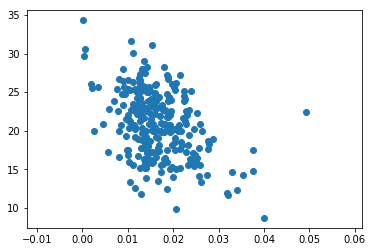

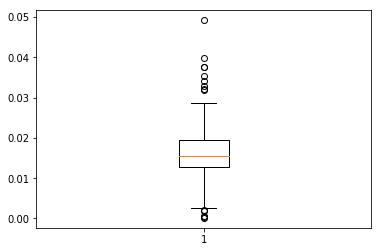

In [211]:
df = merged
df = df[df['All_Tweets'] >= df['PA_Tweets']]
plt.scatter(df['PA_Tweets_Percent'], df['Inactivity_Percent'])
print(scipy.stats.pearsonr(df['PA_Tweets_Percent'], df['Inactivity_Percent']))
plt.show()
plt.boxplot(df['PA_Tweets_Percent'])
plt.show()

,FIPS_Codes,PA_Tweets,All_Tweets,Inactivity_Cases,Inactivity_Percent,Inactivity_Ageadjusted,Diabetes_newcases,Daibetes_rateperhundred,Daibetes_rateperthousand,Diabetes_number,Diabetes_prev,Daibetes_ageadj_prev,Id,Id2,Geography,Estimate; Gini Index,Margin of Error; Gini Index,PA_Tweets_Percent


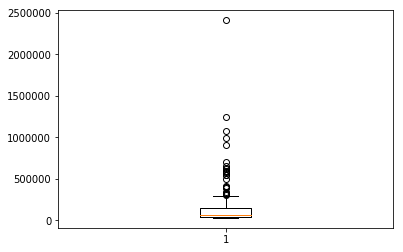

In [178]:
plt.boxplot(df['All_Tweets']);
merged[merged['All_Tweets'] < merged['PA_Tweets']]

In [208]:
scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)
df['asdf'] = df['PA_Tweets_Percent'] * df['Estimate; Gini Index']
model = smf.negativebinomial("Inactivity_Percent ~ PA_Tweets_Percent + Q('Estimate; Gini Index')", 
                               data=df, missing='drop')
results = model.fit(maxiter=5000)
print('AIC =', results.aic)
#print(results.predict())
results.summary()

Optimization terminated successfully.
         Current function value: 2.802568
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
AIC = 1538.2022892308937


/home/brianc/anaconda3/envs/mlenv/lib/python3.5/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:     Inactivity_Percent   No. Observations:                  273
Model:               NegativeBinomial   Df Residuals:                      270
Method:                           MLE   Df Model:                            2
Date:                Thu, 25 Jan 2018   Pseudo R-squ.:                 0.02754
Time:                        00:54:15   Log-Likelihood:                -765.10
converged:                       True   LL-Null:                       -786.77
                                        LLR p-value:                 3.877e-10
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.0123      0.189     15.906      0.000       2.641       3.384
PA_Tweets_Percent           -13.3924      2.125     -6.303      0.000     -17.557      -9.228
Q('Estimate; Gini Index')     0.5257      0.403      1.304      0.192      -0.265       1.316
alpha                      2.981e-07      0.000      0.001      0.999      -0.001       0.001
=============================================================================================
"""

In [147]:
merged['Inactivity_Percent'].var(), merged['Inactivity_Percent'].mean()

(18.527097877612587, 20.82490842490843)